In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

import sys
sys.path.append('..')

from pipeline.pipeline import Pipeline
from pipeline.detection import YOLODetection
from pipeline.pose_estimation import BLAZEPOSEstimation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# init hyperparams
DATASET_DIR = '/home/ishvlad/datasets/LV-MHP-v2/val'
RESULT_DIR = '../data'
batch_size = 20
num_workers = 10
device = 'cuda:0'

# init models
detection_model = YOLODetection(device=device)
pose_model = BLAZEPOSEstimation()

Using cache found in /home/ishvlad/.cache/torch/hub/ultralytics_yolov5_master

                 from  n    params  module                                  arguments                     
  0                -1  1      8800  models.common.Focus                     [3, 80, 3]                    
  1                -1  1    115520  models.common.Conv                      [80, 160, 3, 2]               
  2                -1  1    309120  models.common.C3                        [160, 160, 4]                 
  3                -1  1    461440  models.common.Conv                      [160, 320, 3, 2]              
  4                -1  1   3285760  models.common.C3                        [320, 320, 12]                
  5                -1  1   1844480  models.common.Conv                      [320, 640, 3, 2]              
  6                -1  1  13125120  models.common.C3                        [640, 640, 12]                
  7                -1  1   7375360  models.common.Conv           

Adding autoShape... 


In [8]:
# init pipeline
world = Pipeline(DATASET_DIR, RESULT_DIR, num_workers=num_workers)

# take results instead of full inference
# result_file = world.val_inference(detection_model, pose_model, batch_size=batch_size)
result_file = '../data/outputs/val_YOLO-0.5-detection_BP-0.5-pose.json'

world.calc_metric(result_file);

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.59s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.78s).
Accumulating evaluation results...
DONE (t=0.73s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.561
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.829
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.620
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.578
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.688
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

Loading and preparing results...
DONE (t=0.50s)
creating index...
index created!


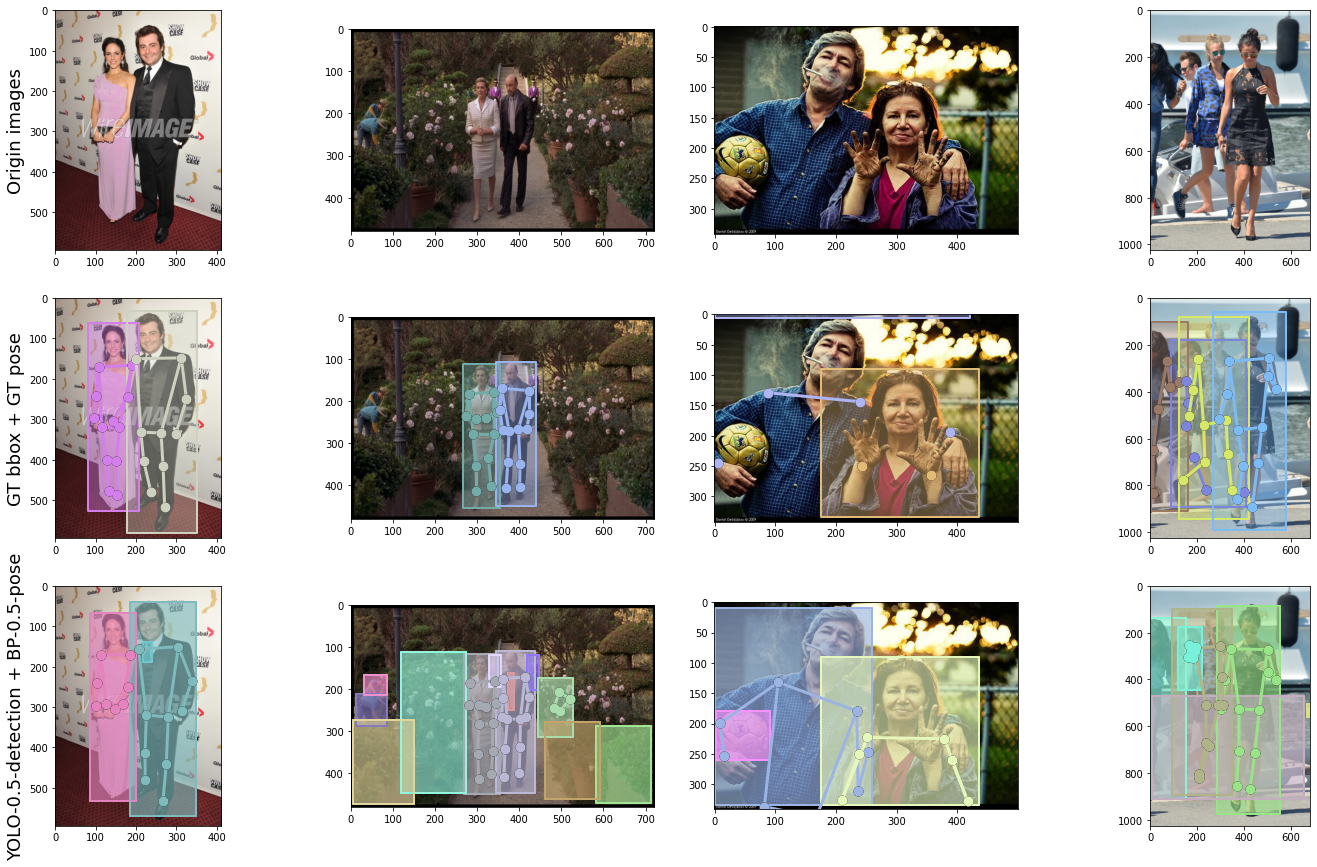

In [9]:
world.plot_sample(result_file, save=False)
plt.show()